In [187]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
#importing datasets

cab_data = pd.read_csv('/Users/sandeepbansal/dataglacier/Data-Glacier-Internship/week2/Cab_Data.csv')
customer_id = pd.read_csv('/Users/sandeepbansal/dataglacier/Data-Glacier-Internship/week2/Customer_ID.csv')
transaction_id = pd.read_csv('/Users/sandeepbansal/dataglacier/Data-Glacier-Internship/week2/Transaction_ID.csv')
city = pd.read_csv('/Users/sandeepbansal/dataglacier/Data-Glacier-Internship/week2/City.csv')

In [61]:
#merging datasets 

df = (transaction_id.merge(cab_data, how= 'inner')).merge(customer_id, how='inner').merge(city, how= 'inner')

In [63]:
#dropping NA values

df.dropna

<bound method DataFrame.dropna of         Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10307228        51406         Cash           43162  Yellow Cab   
359388        10319775        51406         Cash           43203  Yellow Cab   
359389        10347676        51406         Card           43287  Yellow Cab   
359390        10358624        51406         Cash           43314  Yellow Cab   
359391        10370709        51406         Card           43342  Yellow Cab   

     

In [64]:
#dropping duplicate values

df.drop_duplicates()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001"
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001"
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001"
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Female,29,6829,"418,859","127,001"


In [66]:
#data info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB


In [67]:
#descriptive statistics of quantitative characteristics

numerical_col = ['Km Travelled','Cost of Trip','Age','Income (USD/Month)','Price Charged']
df[numerical_col].describe()

,KM Travelled,Cost of Trip,Age,Income (USD/Month),Price Charged
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,286.190113,35.336705,15048.822937,423.443311
std,12.233526,157.993661,12.594234,7969.409482,274.378911
min,1.900000,19.000000,18.000000,2000.000000,15.600000
25%,12.000000,151.200000,25.000000,8424.000000,206.437500
50%,22.440000,282.480000,33.000000,14685.000000,386.360000
75%,32.960000,413.683200,42.000000,21035.000000,583.660000
max,48.000000,691.200000,65.000000,35000.000000,2048.030000


In [92]:
#average profit per km 
df.insert(loc=10,column = 'Average Profit per Km', value = df['Profit']/df['KM Travelled'])

#total profit
df.insert(loc = 10, column = 'Profit', value = df['Price Charged'] - df['Cost of Trip'])

In [141]:
# Number of rides 

no_of_rides = df['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name = 'No. of Rides')
df = pd.merge(df, no_of_rides, on = 'Customer ID')

,Customer ID,No. of Rides
0,494,54
1,2939,53
2,1070,51
3,2766,51
4,944,50
...,...,...
46143,21682,1
46144,37833,1
46145,21364,1
46146,23004,1


In [155]:
#grouping data on the basis of company 

grouped_df = df.groupby('Company').agg({
    'No. of Rides': 'sum',
    'Profit': 'sum'}).reset_index()
print(grouped_df)

      Company  No. of Rides        Profit
0    Pink Cab       1263455  5.307328e+06
1  Yellow Cab       5448379  4.402037e+07


In [165]:
# change the type of Date of Travel datatype into DateTime 

a = df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [166]:
#final data frame

df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Average Profit per Km,Profit,Gender,Age,Income (USD/Month),Population,Users,No. of Rides
0,10000011,29290,Card,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1.882266,57.3150,Male,28,10813,"814,885","24,701",3
1,10351127,29290,Cash,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,10.739870,281.2772,Male,28,10813,"814,885","24,701",3
2,10412921,29290,Card,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,4.574571,194.6480,Male,28,10813,"814,885","24,701",3
3,10000012,27703,Card,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,0.826904,23.6660,Male,27,9237,"814,885","24,701",4
4,10320494,27703,Card,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,6.981330,253.9808,Male,27,9237,"814,885","24,701",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3.740052,143.6180,Female,29,6829,"418,859","127,001",6
359388,10319775,51406,Cash,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,6.455574,23.0464,Female,29,6829,"418,859","127,001",6
359389,10347676,51406,Card,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-0.249531,-5.8540,Female,29,6829,"418,859","127,001",6
359390,10358624,51406,Cash,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-0.220652,-6.0900,Female,29,6829,"418,859","127,001",6


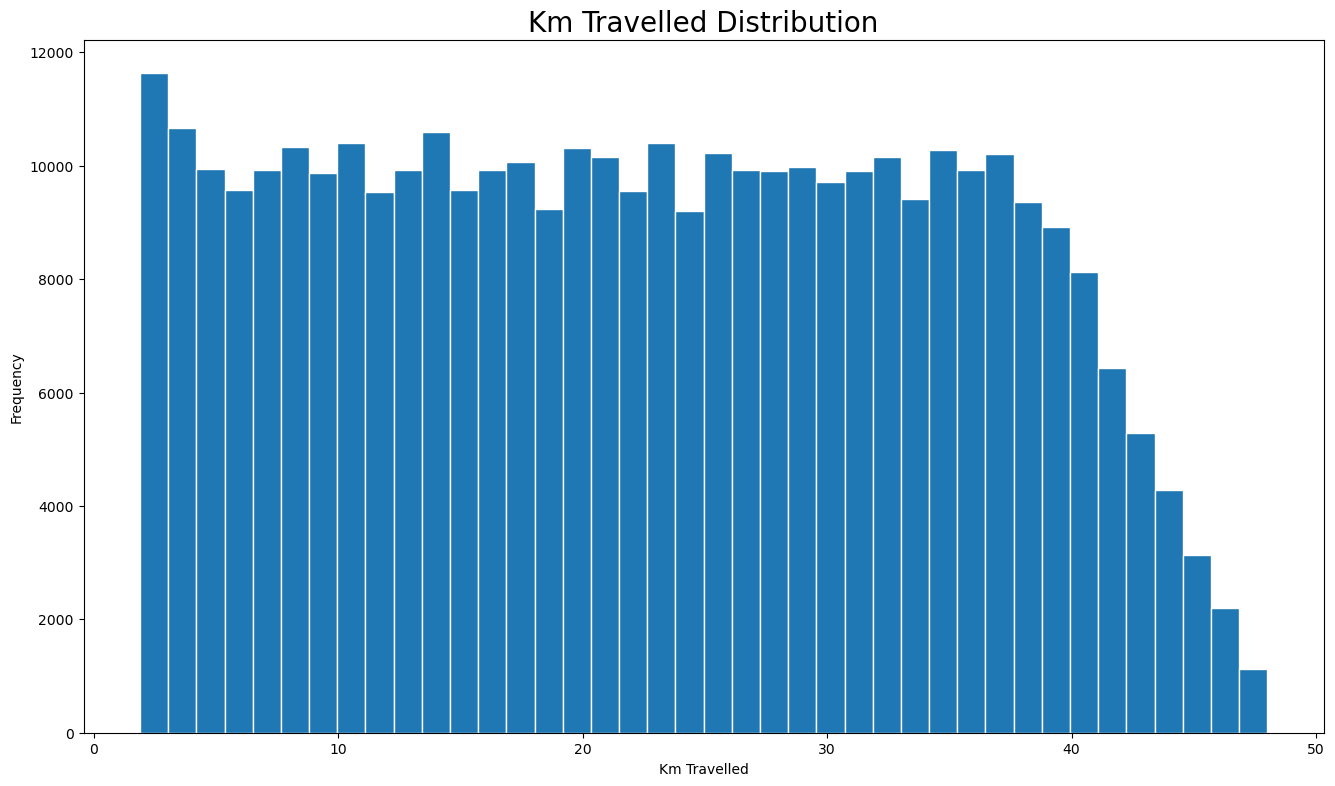

In [172]:
#Visualisations


# 1. KM Travelled
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40, ec='white')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.grid
plt.show() 

#Conclusion: Most rides were in between 2 to 48 KM

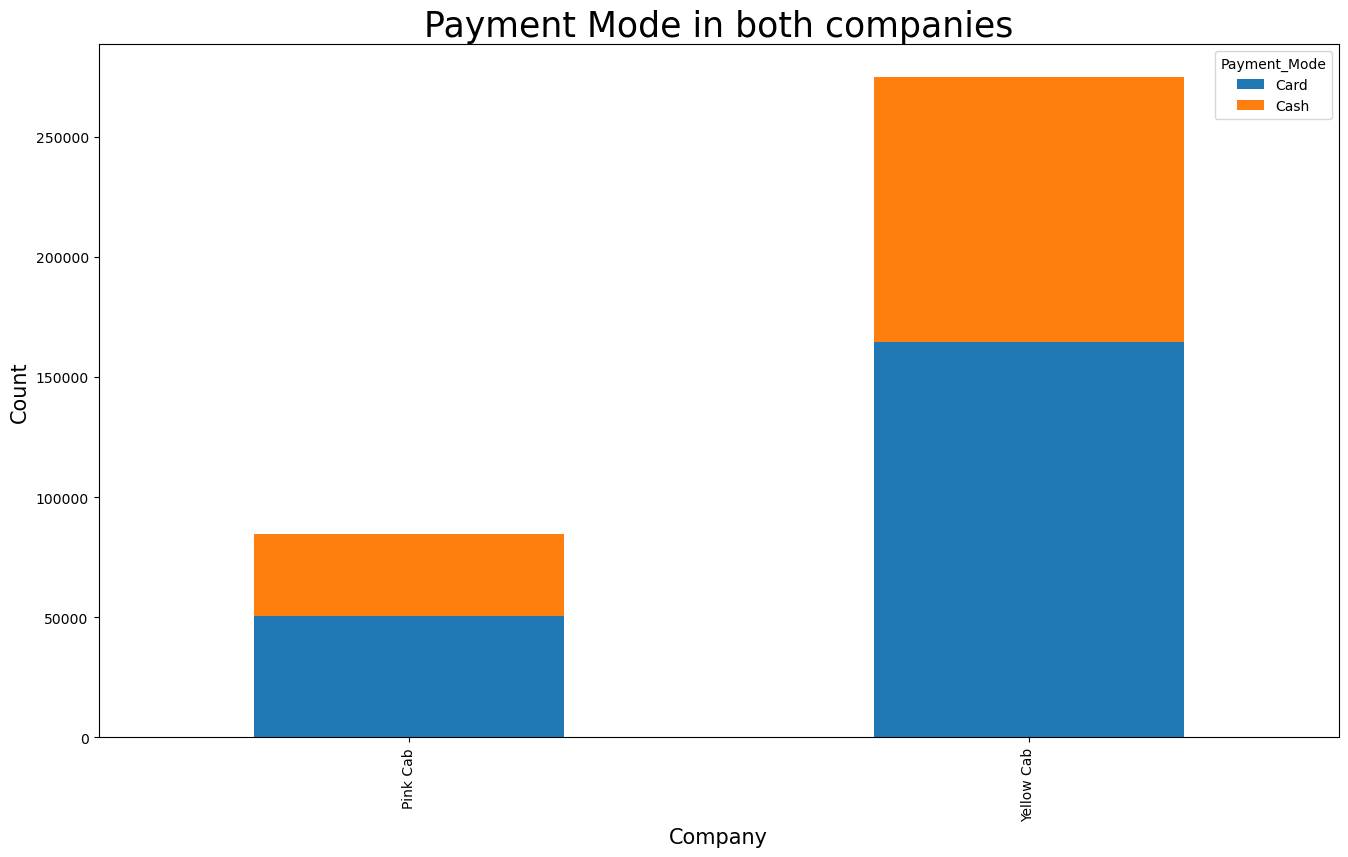

In [174]:
# 2. Payment Mode in both companies

# Calculate the count of each payment mode
payment_mode_count = df['Payment_Mode'].value_counts()

# Set up the figure and axis
plt.figure(figsize=(16, 9))
ax = plt.gca()

# Plot the count of payment modes for each company
df.groupby(['Company', 'Payment_Mode']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

plt.title('Payment Mode in both companies', fontsize=25)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

# Conclusion: Users prefer card as mode of payment rather than cash

<Figure size 1200x800 with 0 Axes>

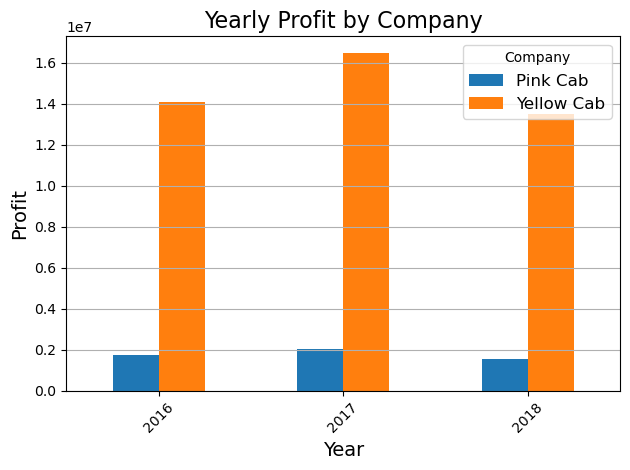

In [184]:
# 3. Calculate profit for each ride
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# Extract the year from 'Date of Travel'
df['Year'] = df['Date of Travel'].dt.year

# Group by 'Year' and 'Company' and calculate the sum of profit for each combination
yearly_profit_by_company = df.groupby(['Year', 'Company'])['Profit'].sum().unstack()

# Plot yearly profit
plt.figure(figsize=(12, 8))
yearly_profit_by_company.plot(kind='bar')
plt.title('Yearly Profit by Company', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Company', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [185]:
# 4. Gender preference in company

gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


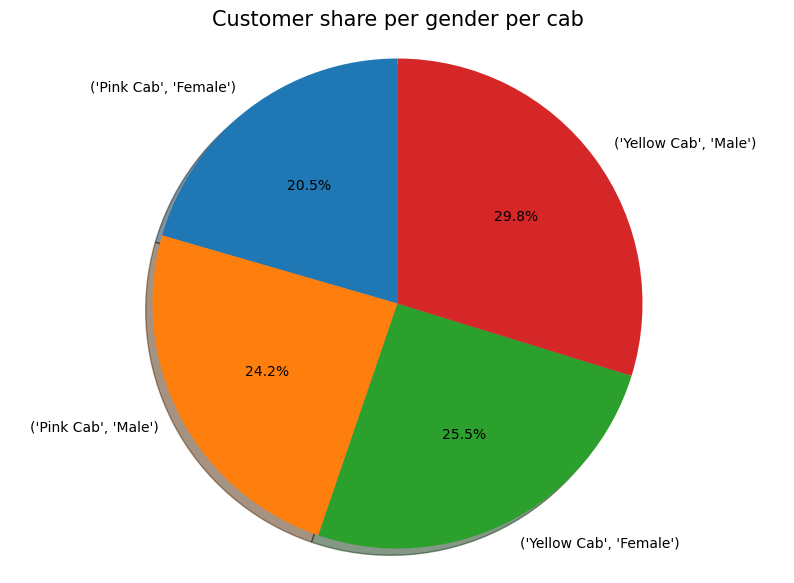

In [186]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

# Conclusion: Both male and female prefer Yellow cab more by approximately 5%

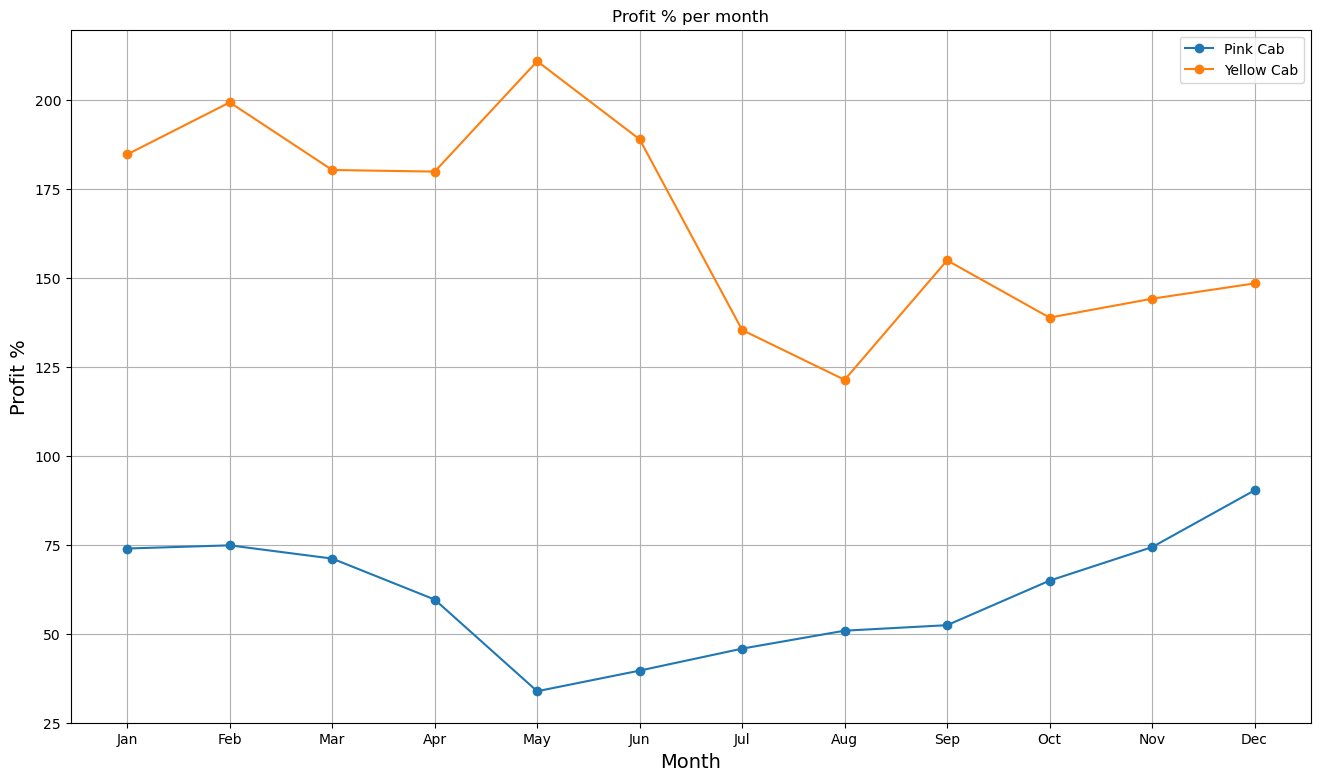

In [215]:
# Profit per month by each company

# Extract month from 'Date of Travel'
df['Month'] = df['Date of Travel'].dt.month

# Group by 'Month' and 'Company' and calculate the mean profit for each combination
monthly_profit_by_company = df.groupby(['Month', 'Company'])['Profit'].mean().unstack()

# Set up the figure and axis
plt.figure(figsize=(16, 9))

# Plot profit for each company
for company in monthly_profit_by_company.columns:
    plt.plot(monthly_profit_by_company.index, monthly_profit_by_company[company], marker='o', label=company)

# Set plot title and labels
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [199]:
# Hypothesis 1.1: Gender plays a role in profit for pink cab

#       Ho : There is no difference in profit in terms of gender for pink cab
#       H1 : There is difference in profit in terms of gender for pink cab

# Filter data by company and gender
pink_cab_male_profit = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Male')]['Profit']
pink_cab_female_profit = df[(df['Company'] == 'Pink Cab') & (df['Gender'] == 'Female')]['Profit']

# Perform t-test for Pink Cab
tstat_pink_cab, pval_pink_cab = ttest_ind(pink_cab_male_profit, pink_cab_female_profit)

print("Pink Cab: p-value:", pval_pink_cab)

print("We accept null hypothesis (H0) that there is no difference in terms of gender for pink cab")

Pink Cab: p-value: 0.11515305900425798
We accept null hypothesis (H0) that there is no difference in terms of gender for pink cab


In [198]:
# Hypothesis 1.2: Gender plays a role in profit for yellow cab

#       Ho : There is no difference in profit in terms of gender for yellow cab
#       H1 : There is difference in profit in terms of gender for yellow cab

# Filter data by company and gender

yellow_cab_male_profit = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Male')]['Profit']
yellow_cab_female_profit = df[(df['Company'] == 'Yellow Cab') & (df['Gender'] == 'Female')]['Profit']

# Perform t-test for Yellow Cab
tstat_yellow_cab, pval_yellow_cab = ttest_ind(yellow_cab_male_profit, yellow_cab_female_profit)

print("Yellow Cab: p-value:", pval_yellow_cab)

print("We accept alternate hypothesis (H1) that there is a difference in terms of gender for yellow cab")

Yellow Cab: p-value: 6.060473042494056e-25
We accept alternate hypothesis (H1) that there is a difference in terms of gender for yellow cab


In [197]:
# Hypothesis 2.1: Age plays a role in profit for pink cab

#       Ho : There is no difference in profit in terms of age for pink cab
#       H1 : There is difference in profit in terms of age for pink cab

# Filter data for Pink Cab
pink_cab_data = df[df['Company'] == 'Pink Cab']

# Group profits by age
age_groups = pink_cab_data.groupby('Age')['Profit'].apply(list)

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*age_groups)

print("p-value for Pink Cab:", p_value)

print("We accept null hypothesis (H0) that there is no difference in terms of age for pink cab")

p-value for Pink Cab: 0.8618554671919694
We accept null hypothesis (H0) that there is no difference in terms of age for pink cab


In [196]:
# Hypothesis 2.2: Age plays a role in profit for pink cab

#       Ho : There is no difference in profit in terms of age for pink cab
#       H1 : There is difference in profit in terms of age for pink cab
import pandas as pd
from scipy.stats import f_oneway

# Assuming your data is stored in a DataFrame called df
# Filter data for Pink Cab
pink_cab_data = df[df['Company'] == 'Yellow Cab']

# Group profits by age
age_groups = pink_cab_data.groupby('Age')['Profit'].apply(list)

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*age_groups)

print("p-value for Yellow Cab:", p_value)

print("We accept alternate hypothesis (H1) that there is a difference in terms of gender for pink cab")

p-value for Yellow Cab: 1.4177354970217492e-95
We accept alternate hypothesis (H1) that there is a difference in terms of gender for pink cab


In [202]:
# Hypothesis 3: Payment Mode Preference

#     H0: Customers prefer using card payments over cash for higher-cost rides
#     H1: Customers do not prefer using card payments over cash for higher-cost rides

# Segment data based on payment mode
card_rides = df[df['Payment_Mode'] == 'Card']['Price Charged']
cash_rides = df[df['Payment_Mode'] == 'Cash']['Price Charged']

# Compare average ride cost for card vs. cash payments
card_rides_avg = card_rides.mean()
cash_rides_avg = cash_rides.mean()

print(f"Average Ride Cost - Card Payment: {card_rides_avg:.2f}")
print(f"Average Ride Cost - Cash Payment: {cash_rides_avg:.2f}")

# Statistical test
t_stat, p_val = ttest_ind(card_rides, cash_rides)
print(f"Hypothesis 3: T-statistic: {t_stat}, P-value: {p_val}")
print("We accept alternate hypothesis (H1)")

Average Ride Cost - Card Payment: 423.39
Average Ride Cost - Cash Payment: 423.52
Hypothesis 3: T-statistic: -0.1357757352564265, P-value: 0.8919986499030284
We accept alternate hypothesis (H1)


In [211]:
# Hypothesis 4: Customer Loyalty

#    Hypothesis: Customers with higher monthly incomes are more likely to be repeat users of the cab service.

# Identify repeat users
repeat_customers = df.groupby('Customer ID').filter(lambda x: len(x) > 1)

# Compare average income of repeat customers to all customers
repeat_customers_avg_income = repeat_customers['Income (USD/Month)'].mean()
all_customers_avg_income = df['Income (USD/Month)'].mean()

print(f"Repeat Customers Average Income: {repeat_customers_avg_income:.2f}")
print(f"All Customers Average Income: {all_customers_avg_income:.2f}")

Repeat Customers Average Income: 15051.21
All Customers Average Income: 15048.82


In [212]:
# Hypothesis 5: Busy Cities

#       Hypothesis: The number of cab rides is positively correlated with the population of the city.


# Group data by city and count rides
rides_per_city = df.groupby('City')['Transaction ID'].count()

# Convert population to numeric and calculate correlation
city_population = df.set_index('City')['Population'].str.replace(',', '').astype(int)
correlation = rides_per_city.corr(city_population)

print(f"Correlation between City Population and Number of Rides: {correlation}")

Correlation between City Population and Number of Rides: 0.9039264586442209


In [214]:
# Hypothesis 6: Preference for Cab Company Based on Trip Cost

#   Hypothesis: There is a significant difference in the cost of trips between customers who choose Pink Cab and those who choose Yellow Cab.

# Compute average Cost of Trip for each company
avg_cost_yellow = df[df['Company'] == 'Yellow Cab']['Cost of Trip'].mean()
avg_cost_pink = df[df['Company'] == 'Pink Cab']['Cost of Trip'].mean()

# Display the results
print(f"Average Cost of Trip: Yellow Cab: {avg_cost_yellow:.2f}")
print(f"Average Cost of Trip: Pink Cab: {avg_cost_pink:.2f}")

Average Cost of Trip: Yellow Cab: 297.92
Average Cost of Trip: Pink Cab: 248.15
